In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve,precision_score,recall_score
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Rainfall forecast.csv")

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
print("The shape of dataset is:",df.shape)

The shape of dataset is: (8425, 23)


In [8]:
df=df.drop_duplicates()
print(f"rows and columns after dropping duplicates: " ,df.shape)

rows and columns after dropping duplicates:  (6762, 23)


In [9]:
print("Columns and Data Types:")
print(df.dtypes)

Columns and Data Types:
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6762 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6762 non-null   object 
 1   Location       6762 non-null   object 
 2   MinTemp        6692 non-null   float64
 3   MaxTemp        6705 non-null   float64
 4   Rainfall       6624 non-null   float64
 5   Evaporation    3841 non-null   float64
 6   Sunshine       3526 non-null   float64
 7   WindGustDir    5820 non-null   object 
 8   WindGustSpeed  5820 non-null   float64
 9   WindDir9am     5968 non-null   object 
 10  WindDir3pm     6468 non-null   object 
 11  WindSpeed9am   6699 non-null   float64
 12  WindSpeed3pm   6662 non-null   float64
 13  Humidity9am    6708 non-null   float64
 14  Humidity3pm    6666 non-null   float64
 15  Pressure9am    5454 non-null   float64
 16  Pressure3pm    5451 non-null   float64
 17  Cloud9am       4896 non-null   float64
 18  Cloud3pm

In [11]:
df.isnull().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

In [12]:
categorical_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='O':
        categorical_col.append(x)
print(f"object data type columns are:\n",categorical_col)

object data type columns are:
 ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [13]:
numerical_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="float64" or df.dtypes[x]=="int64":
        numerical_cols.append(x)
print(f"\nNumber data type columns are:\n",numerical_cols)


Number data type columns are:
 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [14]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

2011-02-11    4
2011-02-18    4
2011-03-18    4
2011-03-19    4
2011-03-20    4
             ..
2016-11-03    1
2016-11-02    1
2016-11-01    1
2016-10-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64


PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64


13.2    58
12.0    57
14.8    53
12.7    53
10.8    52
        ..
26.6     1
28.0     1
26.9     1
1.4      1
26.0     1
Name: MinTemp, Length: 285, dtype: int64


19.0    66
19.8    62
20.8    54
23.8    54
25.0    54
        ..
38.9     1
10.3     1
9.4      1
42.5     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64


0.0      4334
0.2       321
0.4       144
0.6        87
1.2        69
         ... 
73.8        1
23.8        1
61.2        1
128.0       1
40.0        1
Name: Rainfall, Le

In [15]:
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True) 

In [16]:
for col in categorical_col:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [17]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [18]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,6762.000000,6762.000000,6762.000000,6762.00000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000
mean,13.110086,24.093301,2.723410,4.99898,8.421665,38.702159,12.765602,17.562703,67.510500,50.460515,1017.621222,1015.116060,4.519817,4.511979,17.895830,22.700281
std,5.540674,6.130367,10.490138,3.36177,2.789228,13.393977,9.789075,9.548883,17.182756,18.498424,6.027923,5.967643,2.492344,2.343253,5.722418,5.972262
min,-2.000000,8.200000,0.000000,0.00000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.000000,19.600000,0.000000,4.00000,8.800000,30.000000,6.000000,11.000000,56.000000,38.000000,1014.200000,1011.500000,2.000000,3.000000,13.900000,18.400000
50%,13.200000,23.500000,0.000000,4.60000,9.000000,37.000000,11.000000,17.000000,68.000000,50.000000,1017.600000,1015.100000,5.000000,5.000000,18.000000,22.100000
75%,17.400000,28.400000,0.800000,5.00000,9.200000,46.000000,19.000000,24.000000,80.000000,62.000000,1020.900000,1018.400000,7.000000,6.000000,22.200000,26.800000
max,28.500000,45.500000,371.000000,145.00000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [19]:
df.nunique().to_frame("unique values")

,unique values
Date,3004
Location,12
MinTemp,285
MaxTemp,331
Rainfall,250
Evaporation,116
Sunshine,140
WindGustDir,16
WindGustSpeed,52
WindDir9am,16


<Axes: >

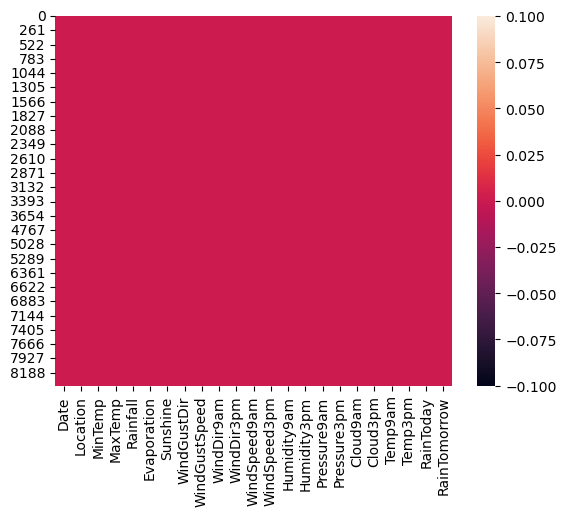

In [20]:
sns.heatmap(df.isnull())

In [21]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

2011-02-11    4
2011-02-18    4
2011-03-18    4
2011-03-19    4
2011-03-20    4
             ..
2016-11-03    1
2016-11-02    1
2016-11-01    1
2016-10-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64


PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64


13.2    128
12.0     57
14.8     53
12.7     53
10.8     52
       ... 
26.6      1
28.0      1
26.9      1
1.4       1
26.0      1
Name: MinTemp, Length: 285, dtype: int64


23.5    99
19.0    66
19.8    62
22.3    54
23.8    54
        ..
38.9     1
10.3     1
9.4      1
42.5     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64


0.0      4472
0.2       321
0.4       144
0.6        87
1.2        69
         ... 
73.8        1
23.8        1
61.2        1
128.0       1
40.0        1
Name: R

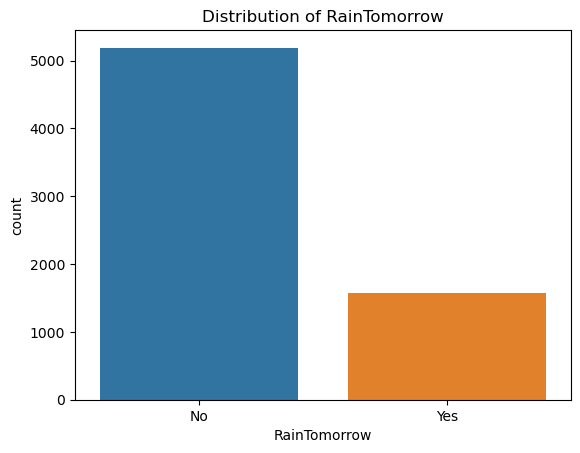

In [22]:
sns.countplot(x='RainTomorrow', data=df)
plt.title('Distribution of RainTomorrow')
plt.show()

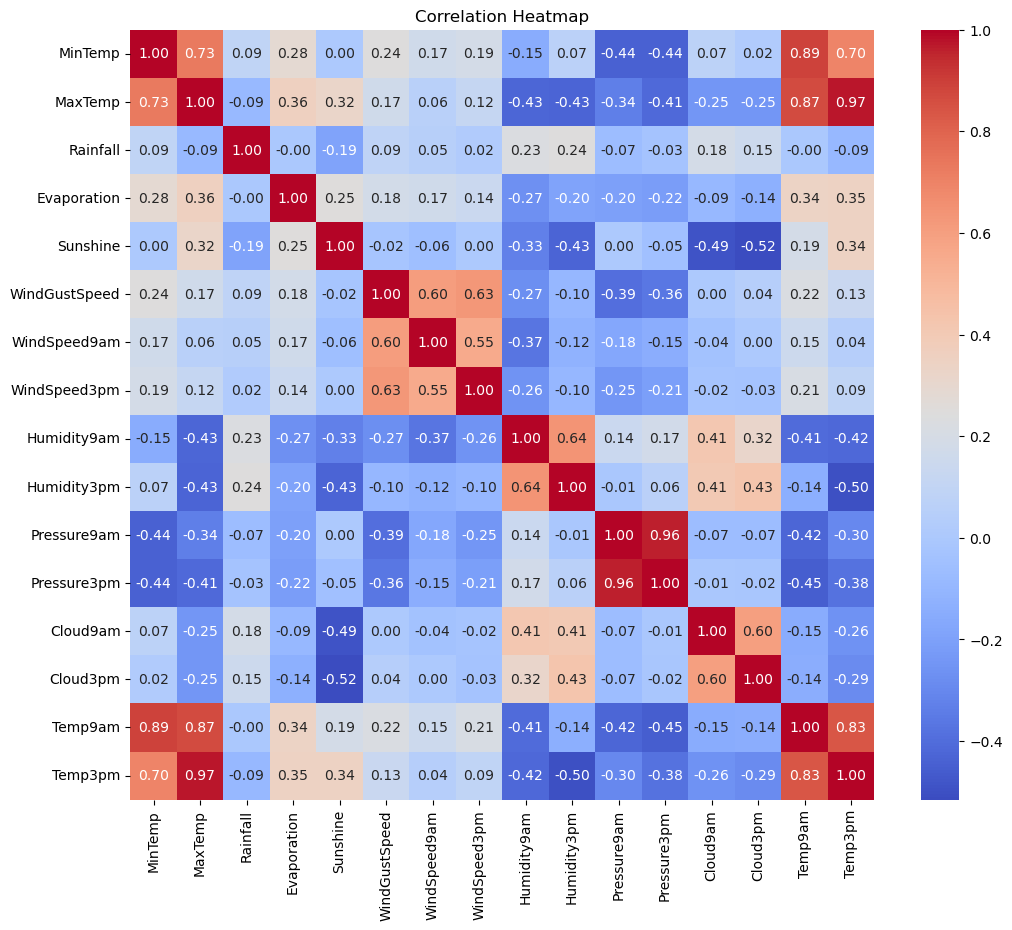

In [23]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

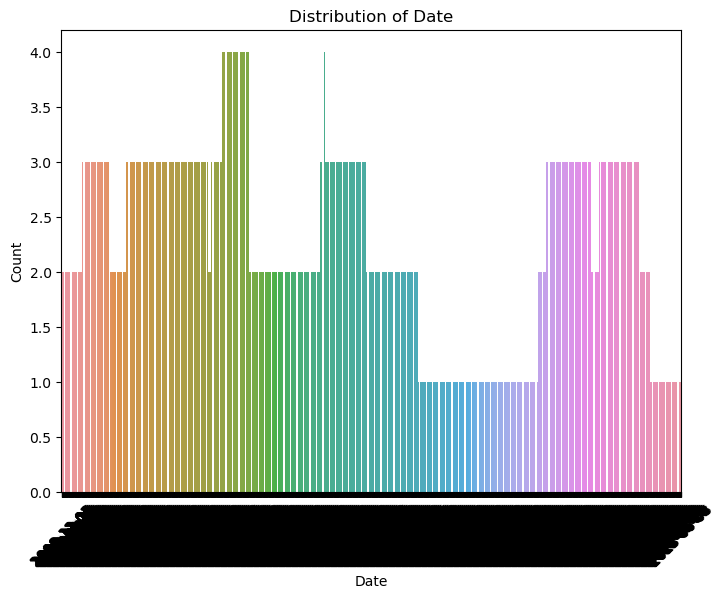

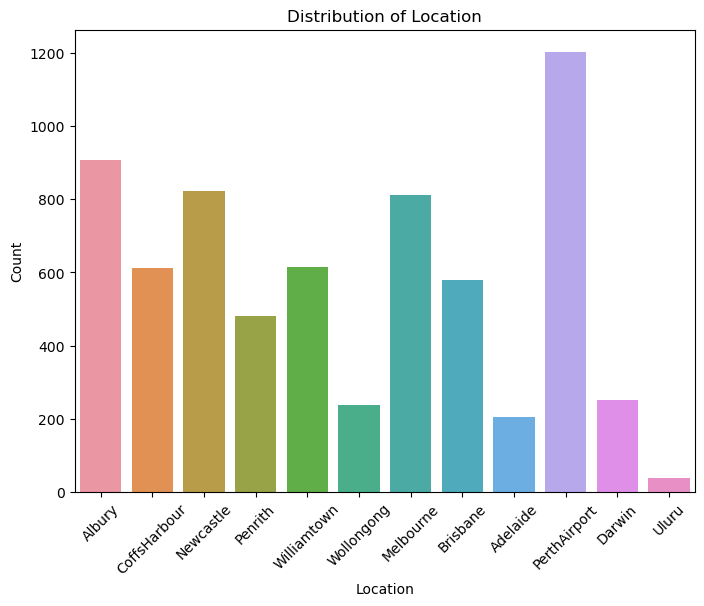

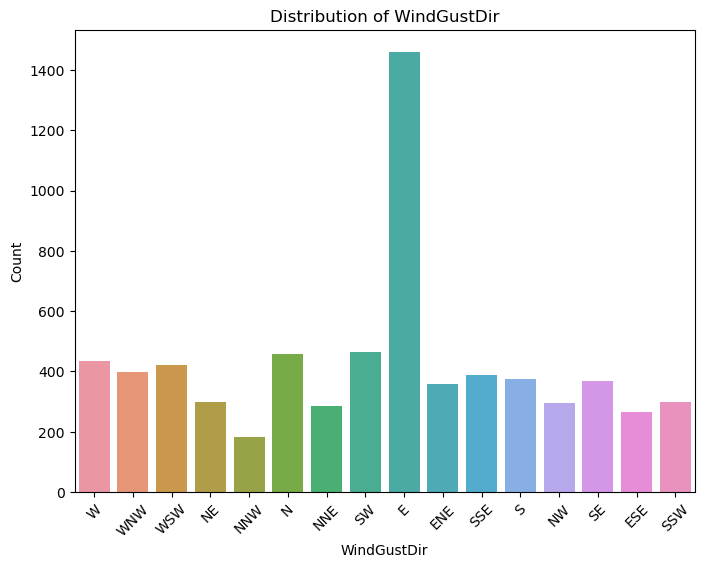

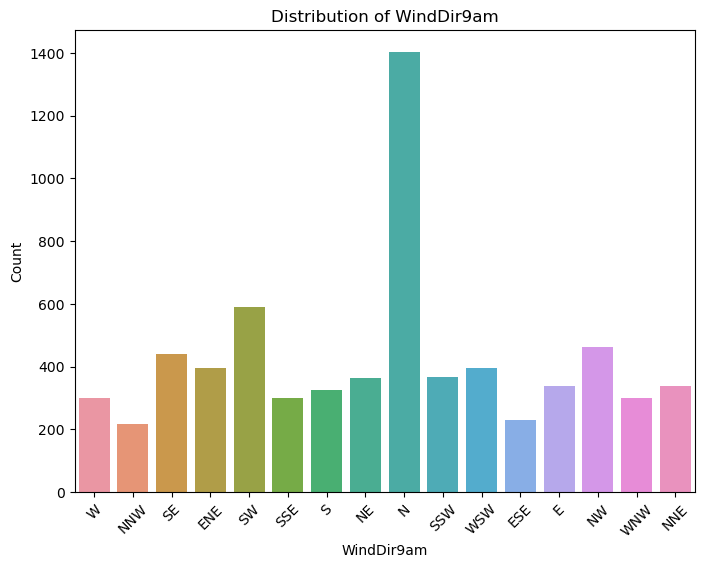

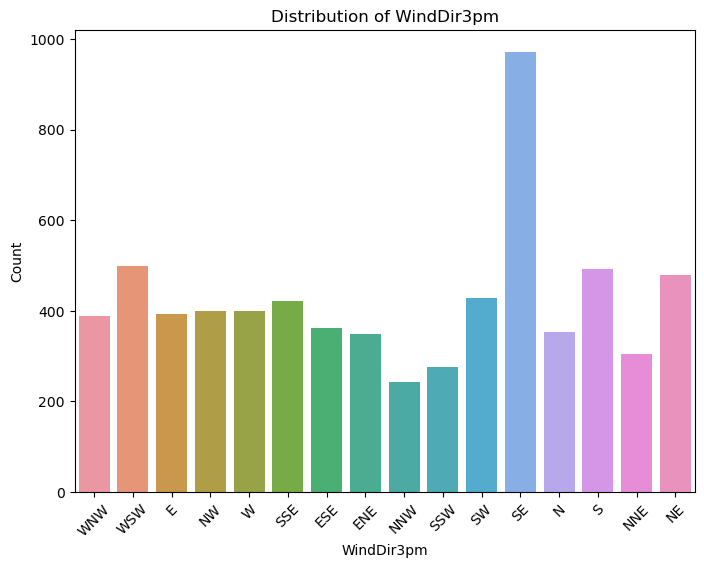

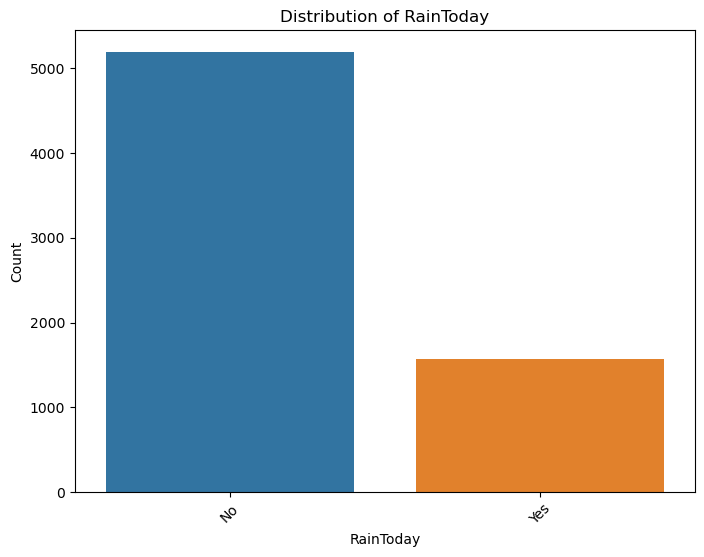

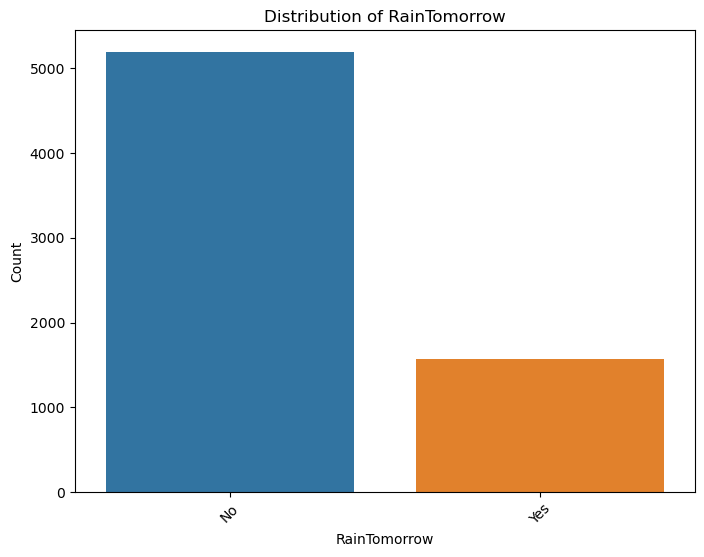

In [24]:
for col in categorical_col:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

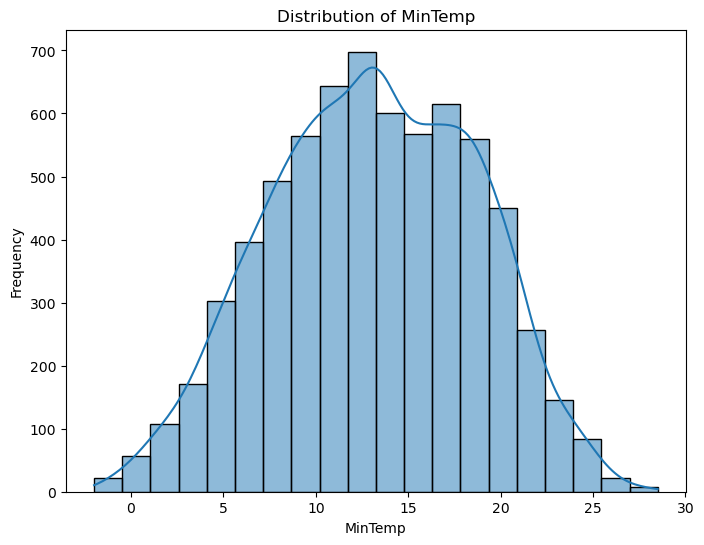

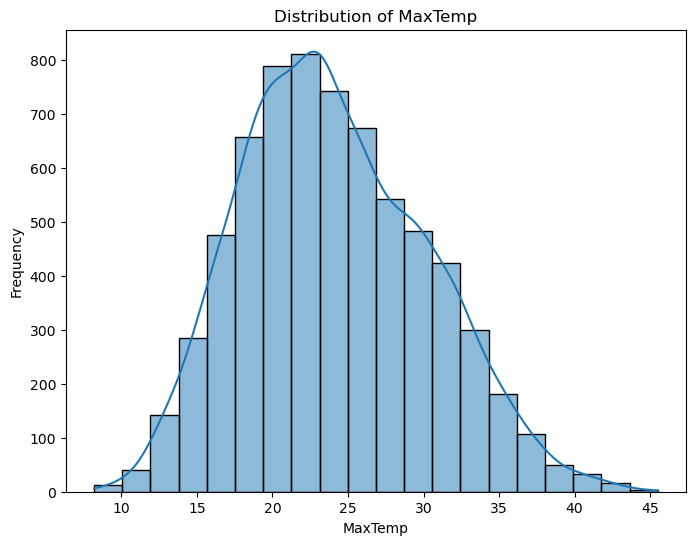

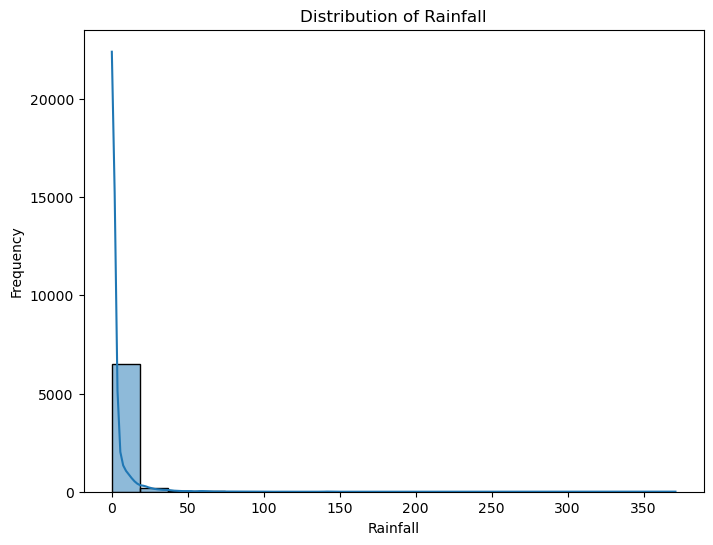

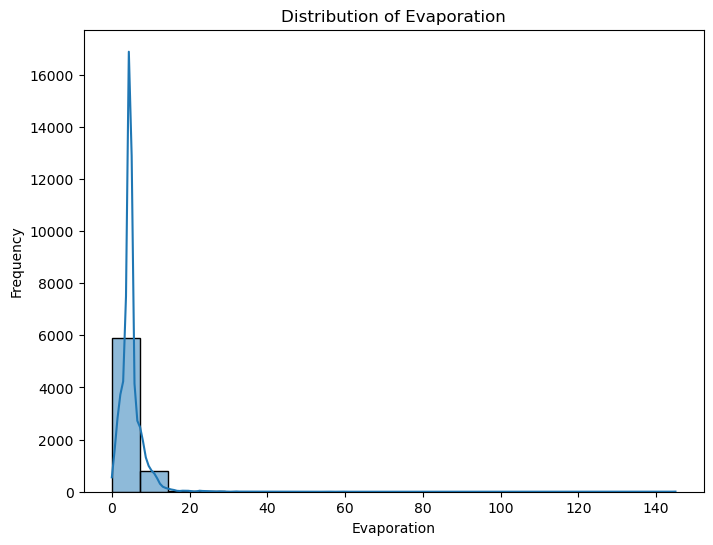

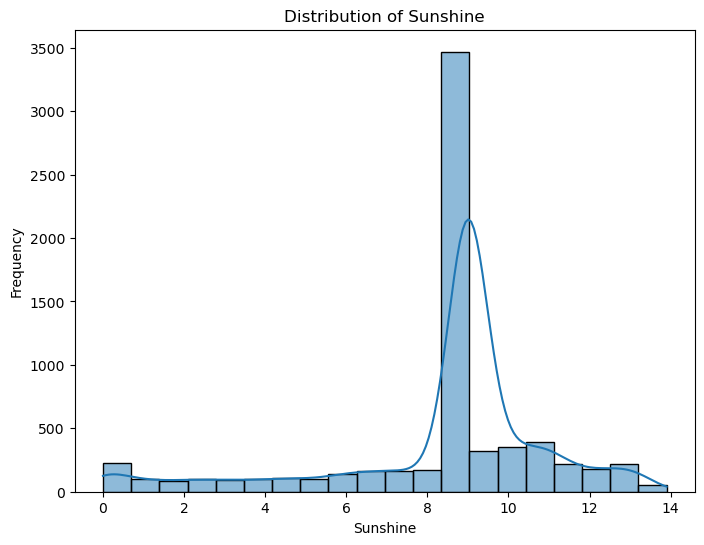

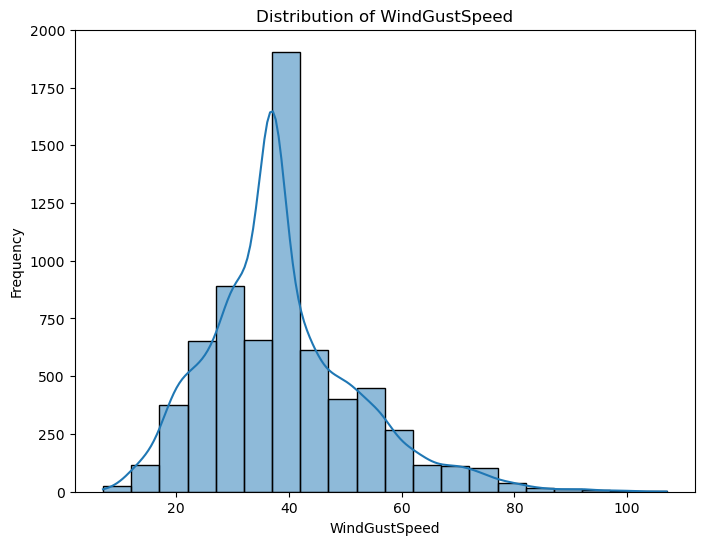

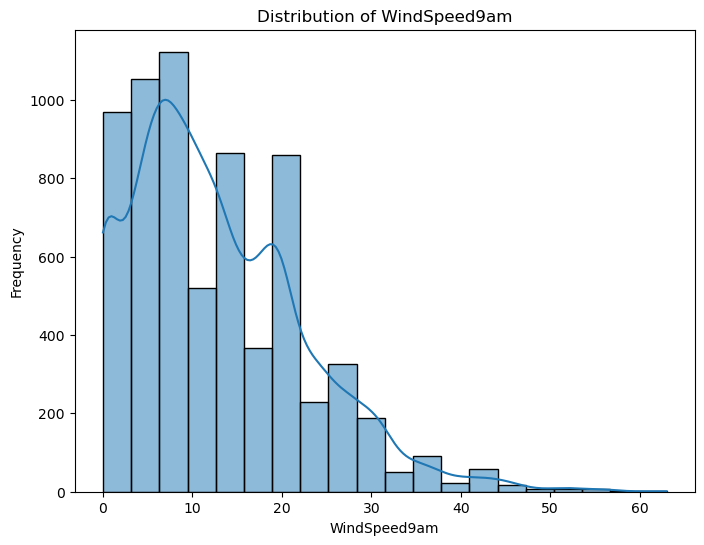

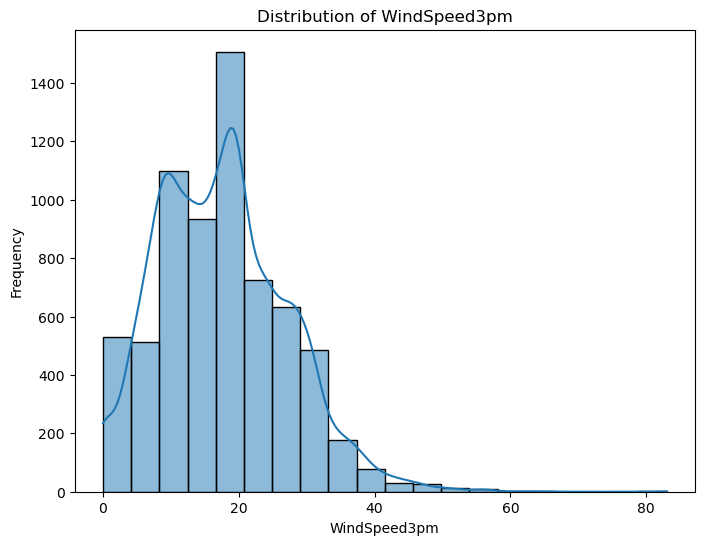

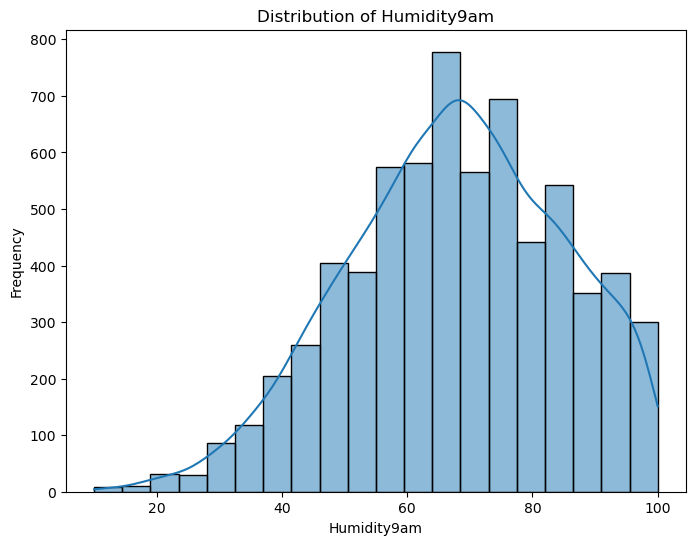

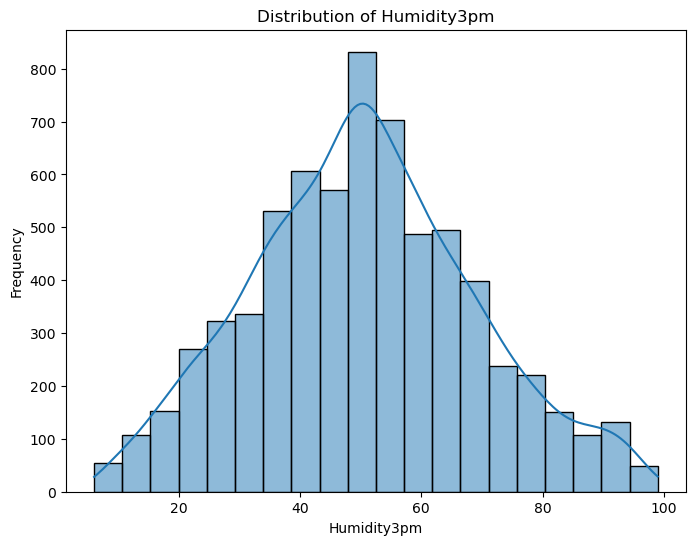

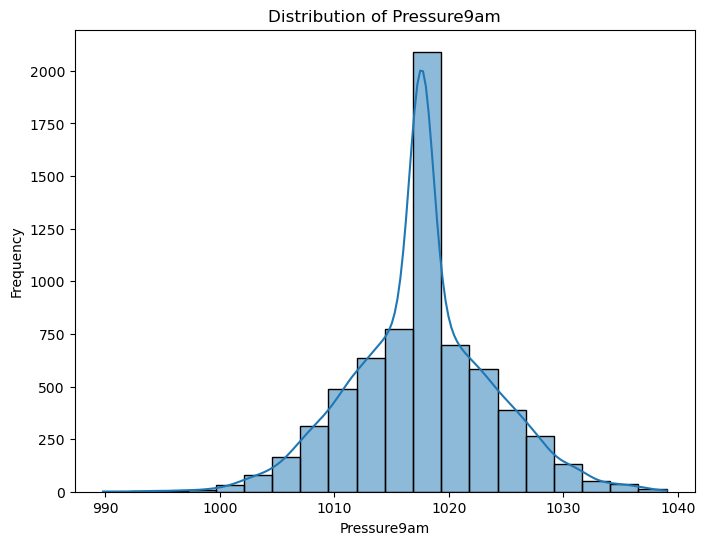

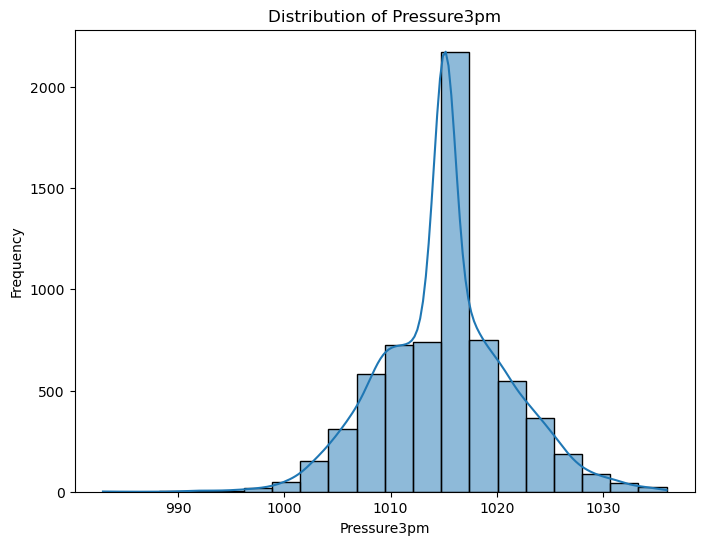

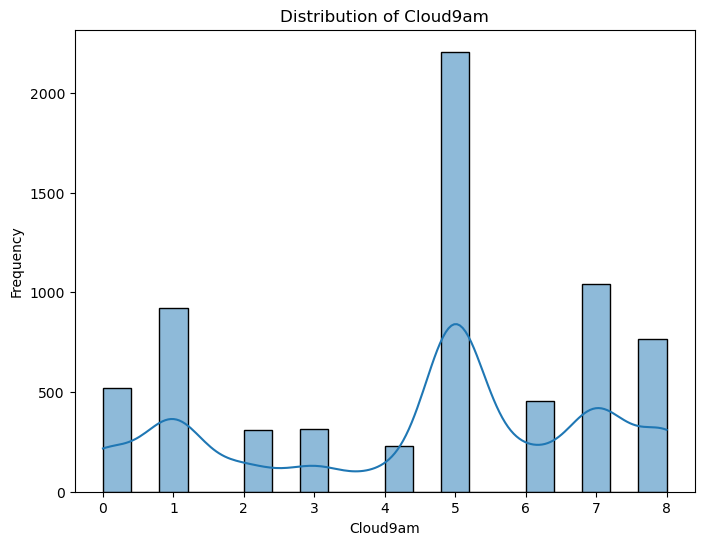

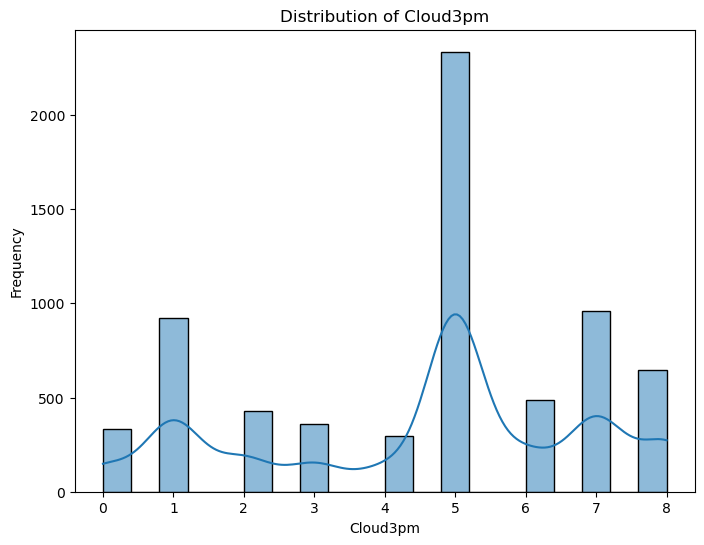

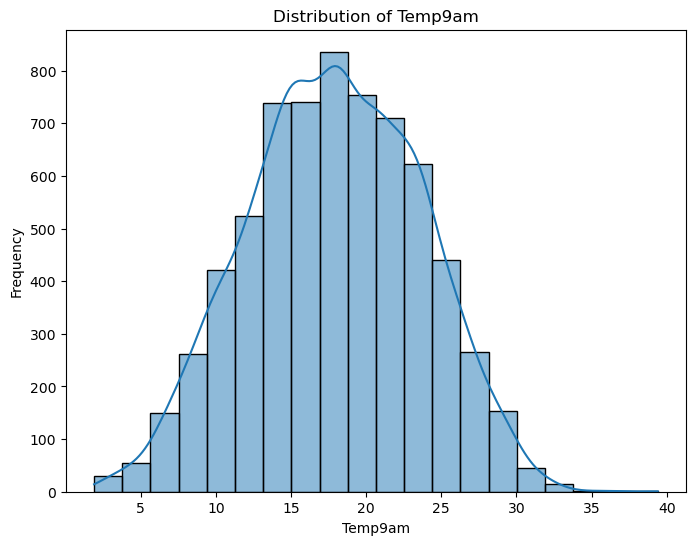

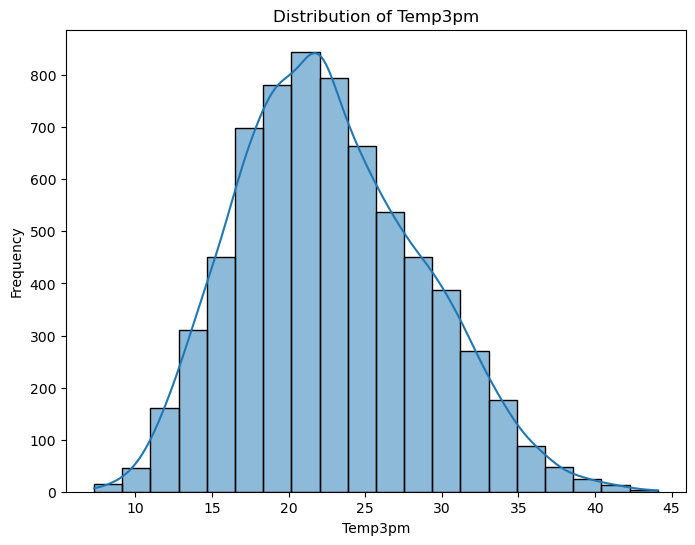

In [25]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [27]:
imputer = SimpleImputer(strategy='mean')
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df[['WindGustDir', 'WindDir9am', 'WindDir3pm']] = df[['WindGustDir', 'WindDir9am', 'WindDir3pm']].fillna(df.mode().iloc[0])

In [30]:
label_encoder=LabelEncoder()
for column in categorical_col:
    df[column] = label_encoder.fit_transform(df[column])

In [31]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [32]:
categorical_col = df.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [33]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_col)])

In [34]:
x = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [44]:
lr_model=LogisticRegression(class_weight='balanced', random_state=42)
lr_model.fit(x_train,y_train)
y_pred_lr=lr_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
roc_auc = roc_auc_score(y_test, y_pred_lr)

print("Logistic Regression model evaluation")
print(f"Accuracy:{accuracy}")
print(f"Precision:{precision}")
print(f"Recall:{recall}")
print(f"F1 score:{f1}")
print(f"ROC-AUC score:{roc_auc}")

Logistic Regression model evaluation
Accuracy:0.7915742793791575
Precision:0.5374149659863946
Recall:0.7523809523809524
F1 score:0.6269841269841271
ROC-AUC score:0.777924580236719


In [45]:
rf_model=RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(x_train,y_train)
y_pred_rf=rf_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred_rf)
precision=precision_score(y_test,y_pred_rf)
recall=recall_score(y_test,y_pred_rf)
f1=f1_score(y_test,y_pred_rf)
roc_auc=roc_auc_score(y_test,y_pred_rf)

print("Random Forest Classifier model evaluation")
print(f"Accuracy:{accuracy}")
print(f"Precision:{precision}")
print(f"Recall:{recall}")
print(f"F1 score:{f1}")
print(f"ROC-AUC score:{roc_auc}")

Random Forest Classifier model evaluation
Accuracy:0.844050258684405
Precision:0.7795698924731183
Recall:0.4603174603174603
F1 score:0.5788423153692615
ROC-AUC score:0.7104092118542985


In [46]:
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],               
    'solver': ['liblinear', 'saga'],       
    'class_weight': ['balanced', None]     
}

lr_model=LogisticRegression(random_state=42)
grid_search=GridSearchCV(estimator=lr_model,param_grid=param_grid_lr,cv=5,scoring='accuracy')
grid_search.fit(x_train,y_train)

print("Best Parameters for Logistic Regression:",grid_search.best_params_)
best_lr_model=grid_search.best_estimator_
accuracy=best_lr_model.score(x_test,y_test)
print("Accuracy of Best Logistic Regression model:",accuracy)

Best Parameters for Logistic Regression: {'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy of Best Logistic Regression model: 0.852180339985218


In [49]:
param_grid_rf = {
    'n_estimators': [50, 100, 150],           
    'max_depth': [None, 10, 20],                
    'min_samples_split': [2, 5, 10],            
    'min_samples_leaf': [1, 2, 3],              
    'class_weight': ['balanced', 'balanced_subsample', None]  
}

rf_model = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(x_train, y_train)

print("Best Parameters for Random Forest Classifier:", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_
rf_accuracy = best_rf_model.score(x_test, y_test)
print("Accuracy of Best Random Forest Classifier Model:", rf_accuracy)

Best Parameters for Random Forest Classifier: {'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy of Best Random Forest Classifier Model: 0.8499630450849963


In [50]:
import joblib

In [51]:
 joblib.dump(best_lr_model, 'logistic_regression_rain_forecast_model.joblib')

['logistic_regression_rain_forecast_model.joblib']

In [53]:
loaded_lr_model = joblib.load('logistic_regression_rain_forecast_model.joblib')
result=loaded_lr_model.score(x_test,y_test)
print(result*100)

85.2180339985218


In [59]:
rf_reg_model = RandomForestRegressor()
rf_reg_model.fit(x_train, y_train)
y_pred=rf_reg_model.predict(x_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
rmae_rf=np.sqrt(mean_absolute_error(y_test,y_pred))
r2_rf=r2_score(y_test, y_pred)
print("\nRandom Forest Regressor:")
print(f"RMSE: {rmse_rf}")
print(f"r2_Score: {r2_rf}")


Random Forest Regressor:
RMSE: 0.33262022761206755
r2_Score: 0.380580321130379


In [62]:
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None,10,20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

rf_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error',verbose=2)
grid_search.fit(x_train, y_train)
print("Best parameters found:")
print(grid_search.best_params_)

best_rf_reg = grid_search.best_estimator_
y_pred_rf = best_rf_reg.predict(x_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor (after fine-tuning):")
print(f"RMSE: {rmse_rf}")
print(f"R2 Score: {r2_rf}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:
{'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Regressor (after fine-tuning):
RMSE: 0.3290484718307018
R2 Score: 0.393811850126924


In [63]:
import joblib

In [70]:
joblib.dump(best_rf_reg, 'rf_reg_rain_forecast.joblib')

['rf_reg_rain_forecast.joblib']

In [72]:
loaded_rf_reg = joblib.load('rf_reg_rain_forecast.joblib')
result=loaded_rf_reg.score(x_test,y_test)
print(result*100)

39.3811850126924
